# This notebook reproduces the plots in Fig. 5 of 2503.10805

### - Start importing libraries

In [1]:
# Global
import sys
import tqdm
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../")

# Local
import examples_utils as eu
import fastPTA.utils as ut
from fastPTA.plotting_functions import my_colormap
from fastPTA.Fisher_code import compute_fisher
from fastPTA.signals import get_signal_model

### - Constants to be used in the analysis

In [2]:
# Total observation time in years
T_obs_yrs = 10.33

# Number of frequencies used in the analysis
n_frequencies = 100

# Specify the type of noise to be used in the analysis
which_experiment = eu.EPTAlike
which_experiment_label = "EPTA"

# Set the label to specify the signal model
signal_label = "power_law_SIGW"

# Current SMBBH SGWB best-fit paramteres
SMBBH_log_amplitude = -7.1995
SMBBH_tilt = 2

# Define the range of values for the SMBBH log-amplitude
vals = np.array([-7.9, -7.6, -7, -6.8])


# The analysis assumes a SIGW template, specify here the input parameters
SIGW_log_amplitude = -1.7
SIGW_log_width = np.log10(0.5)
SIGW_log_pivot = -7.8

# Specify the true signal parameters
SMBBH_parameters = jnp.array([SMBBH_log_amplitude, SMBBH_tilt])

CGW_SIGW_parameters = jnp.array(
    [SIGW_log_amplitude, SIGW_log_width, SIGW_log_pivot]
)

signal_parameters = np.concatenate([SMBBH_parameters, CGW_SIGW_parameters])

# Specify the labels for the signal parameters
parameter_labels = []

# Flag to regenerate all the data
regenerate_data = False

# Define a vector of N_pulsar
pulsar_range = np.unique(np.geomspace(25, 500, 20, dtype=int))

# Number of realizations to use in the Fisher analysis
n_realizations = 10

### - Set the inputs for the Fisher analysis

In [3]:
# Get the signal model
signal_model = get_signal_model(signal_label)

# Dictionary with the kwargs for generate catalog
generate_catalog_kwargs = {
    "n_pulsars": 10,
    "save_catalog": False,
    **which_experiment,
}

# Dictionary with the kwargs to get_tensors
get_tensors_kwargs = {
    "add_curn": False,
    "regenerate_catalog": True,
    "path_to_pulsar_catalog": "pulsar_configurations/EPTA.txt",
}

# Dictionary with the kwargs for the Fisher matrix
fisher_kwargs = {
    "T_obs_yrs": T_obs_yrs,
    "n_frequencies": n_frequencies,
    "signal_model": signal_model,
    "signal_parameters": signal_parameters,
}

### - Compute Fisher errors for 10 realizations, varying  $N_p$.  <br /> NB with current settings a run can take order 20 minutes

In [4]:
try:
    if regenerate_data:
        raise FileNotFoundError
    file = np.load(
        "generated_data/Fisher_errors_" + which_experiment_label + ".npz"
    )
    fisher_errors = file["fisher_errors"]

except FileNotFoundError:

    # Initialize the arrays to store the Fisher matrix results
    fisher_errors = np.zeros(
        shape=(
            len(vals),
            n_realizations,
            len(pulsar_range),
            len(signal_model.parameter_names),
        )
    )

    for j in range(len(pulsar_range)):
        print("At this step number of pulsars: ", pulsar_range[j])

        # Set the number of pulsars in the catalog
        generate_catalog_kwargs["n_pulsars"] = pulsar_range[j]

        for k in tqdm.tqdm(range(len(vals))):
            # Take the right value for alpha_PL
            fisher_kwargs["signal_parameters"][0] = vals[k]

            for i in range(n_realizations):

                # Compute the Fisher matrix
                (
                    frequency,
                    signal,
                    HD_functions_IJ,
                    HD_coeffs,
                    effective_noise,
                    SNR,
                    fisher,
                ) = compute_fisher(
                    **fisher_kwargs,
                    get_tensors_kwargs=get_tensors_kwargs,
                    generate_catalog_kwargs=generate_catalog_kwargs,
                )

                fisher_errors[k, i, j, :] = np.sqrt(
                    np.diag(ut.compute_inverse(fisher))
                )

    np.savez(
        "generated_data/Fisher_errors_" + which_experiment_label + ".npz",
        fisher_errors=fisher_errors,
    )

At this step number of pulsars:  25


100%|██████████| 4/4 [00:01<00:00,  3.21it/s]


At this step number of pulsars:  29


100%|██████████| 4/4 [00:00<00:00,  6.72it/s]


At this step number of pulsars:  34


100%|██████████| 4/4 [00:01<00:00,  3.75it/s]


At this step number of pulsars:  40


100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


At this step number of pulsars:  46


100%|██████████| 4/4 [00:01<00:00,  2.60it/s]


At this step number of pulsars:  54


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


At this step number of pulsars:  64


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


At this step number of pulsars:  75


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


At this step number of pulsars:  88


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


At this step number of pulsars:  103


100%|██████████| 4/4 [00:05<00:00,  1.26s/it]


At this step number of pulsars:  120


100%|██████████| 4/4 [00:05<00:00,  1.39s/it]


At this step number of pulsars:  141


100%|██████████| 4/4 [00:07<00:00,  1.94s/it]


At this step number of pulsars:  165


100%|██████████| 4/4 [00:09<00:00,  2.36s/it]


At this step number of pulsars:  194


100%|██████████| 4/4 [00:10<00:00,  2.63s/it]


At this step number of pulsars:  227


100%|██████████| 4/4 [00:14<00:00,  3.51s/it]


At this step number of pulsars:  266


100%|██████████| 4/4 [00:19<00:00,  4.99s/it]


At this step number of pulsars:  311


100%|██████████| 4/4 [00:33<00:00,  8.41s/it]


At this step number of pulsars:  364


100%|██████████| 4/4 [00:47<00:00, 11.78s/it]


At this step number of pulsars:  427


100%|██████████| 4/4 [01:08<00:00, 17.22s/it]


At this step number of pulsars:  500


100%|██████████| 4/4 [01:47<00:00, 26.86s/it]


### - Average over different realizations

In [5]:
means = np.mean(fisher_errors, axis=1)
stds = np.std(fisher_errors, axis=1)

### - Plot the results for a given parameter

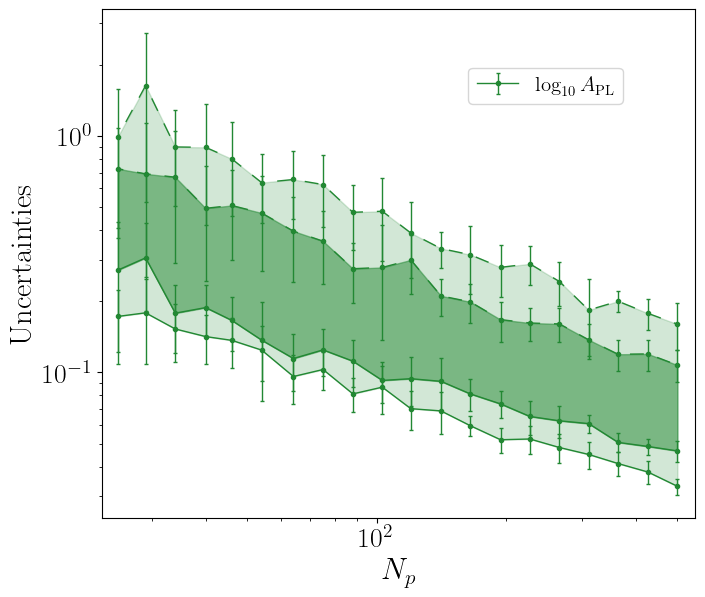

In [6]:
# Choose the parameter you want to plot (0 to 5 for SIGW+PL)
parameter_index = 0

if not parameter_labels:
    parameter_labels = signal_model.parameter_labels

colors = [
    my_colormap["green"],
    my_colormap["red"],
    my_colormap["purple"],
    my_colormap["yellow"],
    my_colormap["blue"],
]

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(
    left=0.133, bottom=0.123, right=0.98, top=0.97, wspace=None, hspace=None
)
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "22"
plt.errorbar(
    pulsar_range,
    means[2, :, parameter_index],
    stds[2, :, parameter_index],
    label=parameter_labels[parameter_index],
    marker="o",
    linestyle="solid",
    linewidth=1,
    markersize=3,
    capsize=1.5,
    color=colors[parameter_index],
)
plt.errorbar(
    pulsar_range,
    means[1, :, parameter_index],
    stds[1, :, parameter_index],
    marker="o",
    linestyle=(6, (10, 10)),
    linewidth=1,
    markersize=3,
    capsize=1.5,
    color=colors[parameter_index],
)
plt.fill_between(
    pulsar_range,
    means[1, :, parameter_index],
    means[2, :, parameter_index],
    color=colors[parameter_index],
    alpha=0.5,
)
plt.errorbar(
    pulsar_range,
    means[3, :, parameter_index],
    stds[3, :, parameter_index],
    marker="o",
    linestyle="solid",
    linewidth=1,
    markersize=3,
    capsize=1.5,
    color=colors[parameter_index],
)
plt.errorbar(
    pulsar_range,
    means[0, :, parameter_index],
    stds[0, :, parameter_index],
    marker="o",
    linestyle=(8, (10, 10)),
    linewidth=1,
    markersize=3,
    capsize=1.5,
    color=colors[parameter_index],
)
plt.fill_between(
    pulsar_range,
    means[3, :, parameter_index],
    means[0, :, parameter_index],
    color=colors[parameter_index],
    alpha=0.2,
)

plt.legend(loc="center left", bbox_to_anchor=(0.6, 0.85), prop={"size": 15})
plt.xlabel("$N_{p}$", fontsize=22)
plt.ylabel("Uncertainties", fontsize=22)
plt.xscale("log")
plt.yscale("log")
plt.xlim(23, 550)
plt.show()